# 💳 Task 3: Credit Card Fraud Detection using Random Forest
In this task, we identify fraudulent transactions using a Random Forest classifier with SMOTE to handle imbalanced data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## 📥 Load and Sample the Dataset
We use a sample of 20,000 rows from the credit card fraud dataset to speed up processing.

In [5]:
# Load and sample dataset
df = pd.read_csv('creditcard.csv')
df = df.sample(n=20000, random_state=42)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


## 📊 Check Class Distribution
We inspect the distribution of classes to confirm imbalance.

In [6]:
print(df['Class'].value_counts())

Class
0    19966
1       34
Name: count, dtype: int64


## 🔄 Split the Data and Apply SMOTE
We use SMOTE to balance the training set.

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

## 🌲 Train the Random Forest Classifier

In [8]:
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

## 📈 Evaluate the Model

In [9]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3993
           1       0.71      0.71      0.71         7

    accuracy                           1.00      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       1.00      1.00      1.00      4000



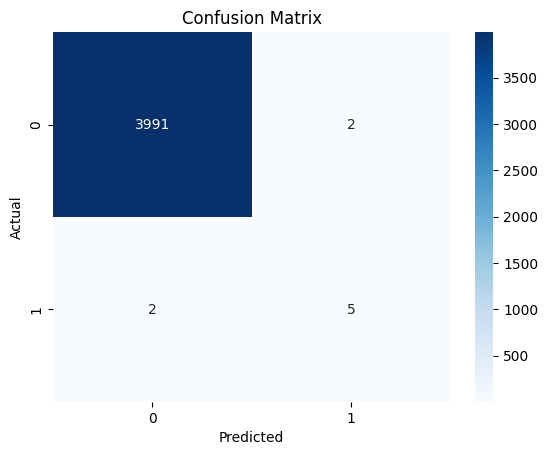

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 🔍 Custom Prediction Function

In [18]:
def predict_transaction(sample):
    sample = pd.DataFrame([sample], columns=X.columns)
    return model.predict(sample)[0]

# Example prediction (pass 30 values)
k=predict_transaction([
    10000.0,  # Time
    -1.3598, -0.0728, 2.5363, 1.3782, -0.3383, 0.4623, 0.2396,
    0.0987, 0.3637, 0.0908, -0.5516, -0.6178, -0.9914, -0.3112,
    1.4681, -0.4704, 0.2079, 0.0258, 0.4039, 0.2514, -0.0183,
    0.2778, -0.1104, 0.0669, 0.1285, -0.1891, 0.1335, 149.62, 29.43  # Amount
])

if k==0: 
    print("Non Fraud Transaction")
else:
    print("Fraud Transaction")


Non Fraud Transaction
